# Maze Generators

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from collections import OrderedDict, deque, defaultdict, namedtuple
from itertools import product
from math import sqrt, pi, sin, cos
from random import random, randint, choice, shuffle
import os
from IPython.display import display, clear_output, Image, HTML
import ipywidgets as widgets
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from drawing import VectorImage

-----

# A) Pefect Maze on Square Grid using DFS

Process: start with all edges, then destroy them using random DFS from any point (backtrack from dead ends, don't create loops).

Representation of edges: (x1, y1, x2, y2), where (x1, y1) < (x2, y2) are the neighboring fields. OR? (p1, p2)?

Or using redundancy: for each field we have four boolens whether there is a wall in that direction. TODO: try both and compare

In [4]:
a = [1,2,3]
shuffle(a)
a

[2, 3, 1]

In [27]:
DIRS

[(1, 0), (0, 1), (-1, 0), (0, -1)]

/home/xeffenb1/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


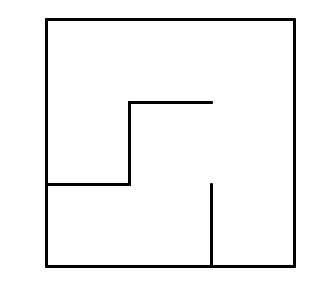

In [56]:
# Directions: right, up, left, down
DIRS = [(1, 0), (0, 1), (-1, 0), (0, -1)]
SHIFTS = [(1, -1), (1, 0), (0, 0), (0, -1)]  # for drawing

def create_perfect_maze(size):
    maze = create_full_maze(size)
    destroy_walls_dfs(maze)
    #return maze
    return draw_maze(maze)

def create_full_maze(size):
    return {(x, y): [True, True, True, True]
            for x in range(size) for y in range(size)}
        
def destroy_walls_dfs(maze, visited=None, start=(0, 0)):
    visited = visited or set()
    visited.add(start)
    #print('visit', start)
    order = list(range(4))
    shuffle(order)
    for i in order:
        neighbor = move(start, DIRS[i])
        #print('neighbor', neighbor)
        if neighbor in maze and neighbor not in visited:
            #print('breaking wall', start, i, 'and', neighbor, (i+2)%4)
            maze[start][i] = False
            maze[neighbor][(i+2)%4] = False
            destroy_walls_dfs(maze, visited, neighbor)

def move(point, d):
    return (point[0] + d[0], point[1] + d[1])

def draw_maze(maze, linewidth=3, **kwargs):
    im = VectorImage()
    for point, walls in maze.items():
        for i, is_wall in enumerate(walls):
            if is_wall:
                p1 = move(point, SHIFTS[i])
                p2 = move(point, SHIFTS[(i+1)%4])
                #print('wall', p1, p2)
                im.line(p1, p2, linewidth=linewidth, **kwargs)
    return im

# TODO: Fix displaying images
create_perfect_maze(3).fig
#draw_maze({(0, 0): [True, True, True, True]}).fig